<a href="https://colab.research.google.com/github/ZJYCP/DL_learn/blob/master/pre/%E6%95%B0%E5%AD%97%E5%9B%BE%E5%83%8F%E5%A4%84%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip list

In [115]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

# 一、直方图技术

## 读取图片


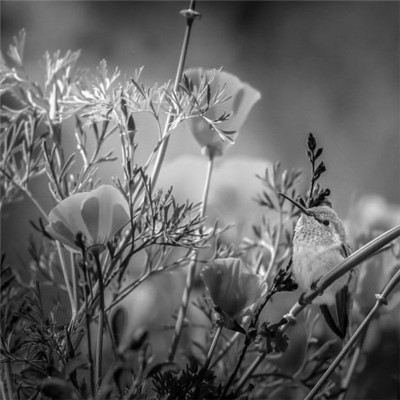

In [79]:
# 采用灰度图的方式读取图片
# img = cv2.imread("test.jpg",cv2.IMREAD_GRAYSCALE)

img = cv2.imread("2.jpg",cv2.IMREAD_GRAYSCALE)

cv2_imshow(img)

## 显示直方图

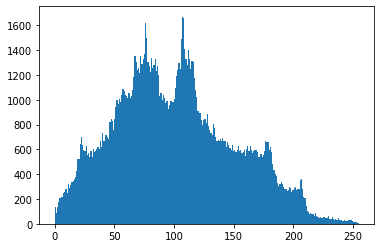

In [61]:
## 显示直方图
# hist = cv2.calcHist([img], [0], None, [256], [0, 256])
# plt.plot(hist, color='red')
plt.hist(img.flatten(),256)
plt.show()

## 直方图均衡化


In [105]:

# 该函数也可直接使用opencv的，cv2.equalizeHist(img)
def myEqualizeHist(image):
  '''
  Args:
    image: 图像

  Returns：
    res_images: 均衡化之后的图像
    inhist: 映射表
  '''
  # 构造映射表
  mHist=[]
  mNum=[]
  inhist=[]

  for i in range(256):
    mHist.append(0)
  row,col=image.shape#获取原图像像素点的宽度和高度

  for i in range(row):
    for j in range(col):
      mHist[image[i,j]] += 1#统计灰度值的个数
  mNum.append(mHist[0]/image.size)

  for i in range(0,255):
    mNum.append(mNum[i]+mHist[i+1]/image.size) #计算累计直方图

  for i in range(256):
    inhist.append(round(255*mNum[i]))  #保存映射关系

  res_image=image.copy()
  # 新的图像
  for i in range(row):
    for j in range(col):
      res_image[i,j] = inhist[image[i,j]]

  return res_image,inhist

<function matplotlib.pyplot.show>

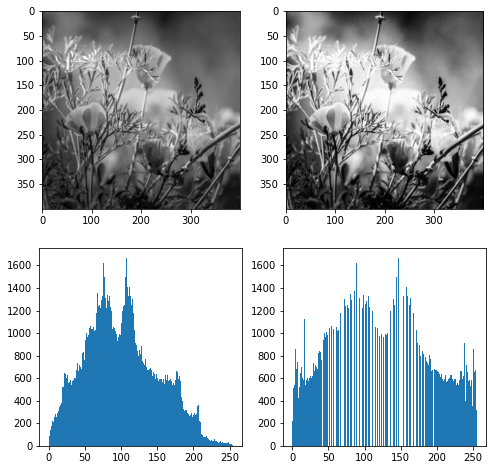

In [106]:
plt.figure(figsize=(8,8))

#原图
plt.subplot(221)
plt.imshow(img,cmap ='gray')
# 均衡化之后的图像，比较简单，直接调用opencv的函数好了
equ,_ = myEqualizeHist(img)
plt.subplot(222)
plt.imshow(equ,cmap ='gray')

# 显示原直方图
plt.subplot(223)
plt.hist(img.ravel(),256)
# 显示均衡化后的直方图
plt.subplot(224)
plt.hist(equ.ravel(),256)
plt.show


## 直方图规定化

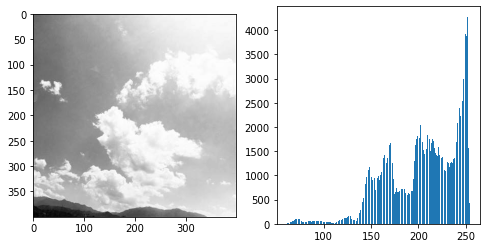

In [107]:
# 先引入一张高调图像，它的直方图作为我们的目标直方图
img_target = cv2.imread("3.jpg",cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img_target,cmap='gray')
ax2 = fig.add_subplot(1,2,2)
ax2.hist(img_target.ravel(),256)
plt.show()


In [108]:
# 取得原图和目标图的累计直方图
_, map_source = myEqualizeHist(img)
_, map_target = myEqualizeHist(img_target)

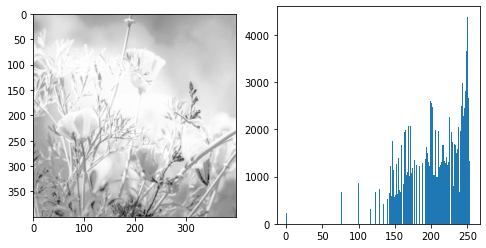

In [114]:
g = []
for i in range(256):
  a = map_source[i]
  flag = True
  for j in range(256):
    if map_target[j] == a:
      g.append(j)
      flag = False
      break
  if flag == True:
    minp = 255
    for j in range(256):
      b = abs(map_target[j]-a)
      if b < minp:
        minp = b
        jmin = j
    g.append(jmin)

res_image = img.copy()
for i in range(row):
  for j in range(col):
    res_image[i,j] = g[img[i,j]]

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(res_image,cmap='gray')
ax2 = fig.add_subplot(1,2,2)
ax2.hist(res_image.ravel(),256)
plt.show()

可以看到，规定化后的图像呈现高亮度，其直方图与目标直方图几乎相同

# 二、中值滤波算法


## 载入图片

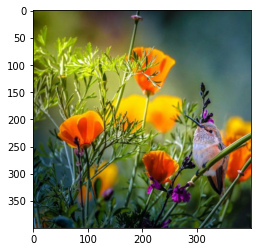

In [120]:
img = cv2.imread("2.jpg")
# 转为rbg格式
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)


## 中值滤波

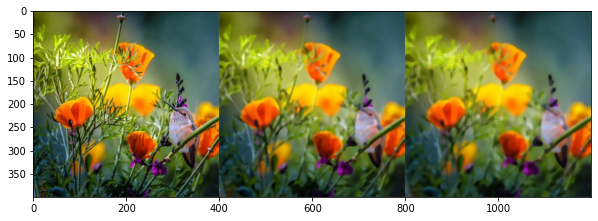

In [125]:
# 这里使用opencv的中值滤波函数 medianBlur
blured = np.hstack([
        cv2.medianBlur(img, 1),
        cv2.medianBlur(img, 7),
        cv2.medianBlur(img, 9)
    ])

plt.figure(figsize=(10, 8))

plt.imshow(blured)

可以看到，随着滤波窗口尺寸的增大，图像更加模糊

# 三、图像锐化-拉普拉斯算法

## 载入图片

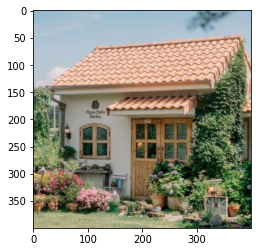

In [181]:
img = cv2.imread("test.jpg")
# 转为rbg格式
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

## 图像锐化

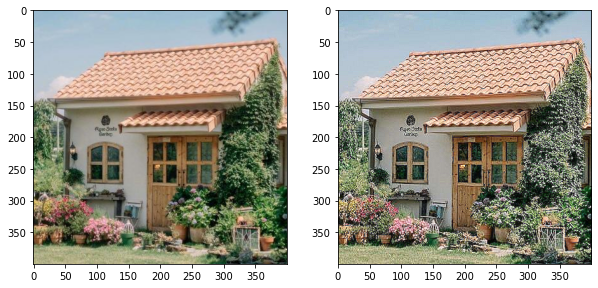

In [207]:
# 定义拉普拉斯算子
kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], np.float32)
# 直接进行卷积运算
dst = cv2.filter2D(img, cv2.CV_16S, kernel=kernel)
# 与原图进行运算
dst = img + 0.8 * dst
# 转为uint8类型
dst = cv2.convertScaleAbs(dst)
# 显示图像
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(dst)

可以看到，经过锐化后，图像的边缘更加明显